# Project: Stears Data Analysis Assessment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Profiling and Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [20]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/full_stears_updated_data.csv')

# Data Profiling and Wrangling

A glimpse into the dataset

In [3]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,3,abandoned,NGN,NaN,NaN
3,4,success,NGN,NG,Nigeria
4,5,abandoned,NGN,NG,Nigeria


In [4]:
df.tail()

,id,status,currency,country_code,country_name
3271,3272,abandoned,NGN,NaN,NaN
3272,3273,abandoned,NGN,NG,Nigeria
3273,3274,abandoned,NGN,NaN,NaN
3274,3275,abandoned,USD,NaN,NaN
3275,3276,success,NGN,NG,Nigeria


NB: I had done preliminary cleaning in Google sheet and Microsoft excel prior to this point. 
Since the dataset is not too large, I manually created addition feature (country_name) to aid analysis.

# Quality Issues
country_code and country_name have missing values
Empty/Null values are stored as NaN and should be identified and replaced.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3276 non-null   int64 
 1   status        3276 non-null   object
 2   currency      3276 non-null   object
 3   country_code  1960 non-null   object
 4   country_name  1962 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.1+ KB


The above code gives a more detailed information about our data types.
All except the id (int64, an integer) variables (column) are object (string) data type.

In [6]:
df.isna().sum()

id                 0
status             0
currency           0
country_code    1316
country_name    1314
dtype: int64

From the above analysis, it is seen that there are a lot of missing values in the country_code and country_name columns

In [7]:
df.shape

(3276, 5)

There are 3276 observations and 5 columns

In [8]:
len(df)

3276

# Exploratory Data Analysis and Visualization

<AxesSubplot:>

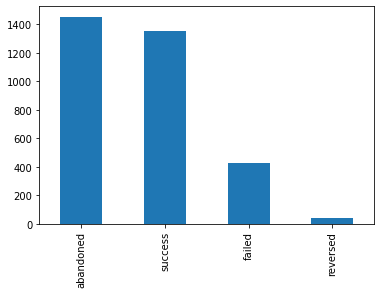

In [9]:
df['status'].value_counts().plot(kind='bar')

From the above visual, it is clear that:
1. Exactly 1,454 payments were abandoned by the customers. This accounts for 44.4% of the data.
2. Exactly 1,352 payments were successful. This accounts for 41.3% of the data.
3. Exactly 429 payments failed. This accounts for 13.1% of the data.
4. Exactly 41 payments were reversed. This accounts for 1.3% of the data.

<AxesSubplot:>

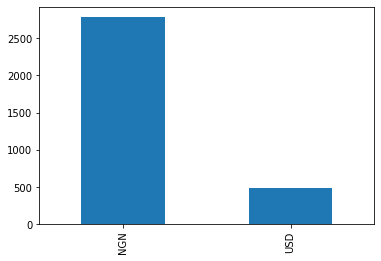

In [10]:
df['currency'].value_counts().plot(kind='bar')

From the above visual, we can see that:
1. Naira (NGN) accounted for 85.1% (2788 counts) of the total payments made for subscription.
2. Dollars (USD) accounted for 14.9 (488 counts) of the total payments made for subscription.

<AxesSubplot:>

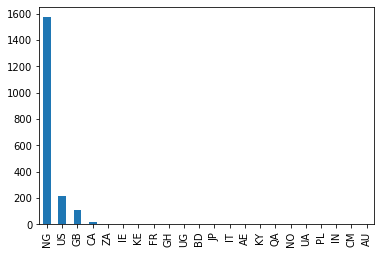

In [11]:
df['country_code'].value_counts().plot(kind='bar')

<AxesSubplot:>

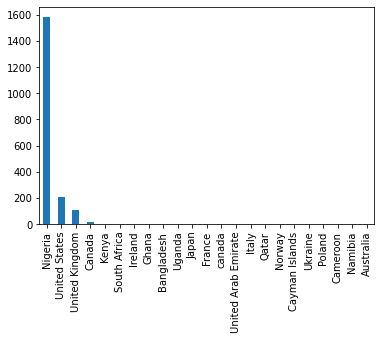

In [12]:
df['country_name'].value_counts().plot(kind='bar')

From the last two visuals above, we can see that:
1. Majority of our subscribers are from Nigeria. This accounts for almost 1600 of the total customer base.
2. United States follow with a littl bit above 200 subscribers.
3. Next is United Kingdom and lastly, Canada. The rest is shared among the rest of the countries.

In [21]:
df.drop(['country_code'], axis=1, inplace=True)

In [22]:
df.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,3,abandoned,NGN,NaN
3,4,success,NGN,Nigeria
4,5,abandoned,NGN,Nigeria


In [23]:
#Save a copy of the data df to df_new
df_new = df.copy()

In [24]:
# Decoding the status variable. Set success to 1, others to 0
df_new.status = np.where(df_new.status == "success", 1, 0)
df_new.status.value_counts()

0    1924
1    1352
Name: status, dtype: int64

In [25]:
# Checking to confirm the encoding is done
df_new.head()

,id,status,currency,country_name
0,1,0,USD,United States
1,2,1,NGN,Nigeria
2,3,0,NGN,NaN
3,4,1,NGN,Nigeria
4,5,0,NGN,Nigeria


In [50]:
df_new.drop(['id'], axis=1, inplace=True)

In [52]:
df_new.head()

,status,currency,country_name
0,0,USD,United States
1,1,NGN,Nigeria
2,0,NGN,NaN
3,1,NGN,Nigeria
4,0,NGN,Nigeria


In [91]:
# Query all rows with status equals 0 (This contained the abandoned, failed, and reversed payments)
df_new.query("status == 0")
print(df_new)


      status currency   country_name
0          0      USD  United States
1          1      NGN        Nigeria
2          0      NGN            NaN
3          1      NGN        Nigeria
4          0      NGN        Nigeria
...      ...      ...            ...
3271       0      NGN            NaN
3272       0      NGN        Nigeria
3273       0      NGN            NaN
3274       0      USD            NaN
3275       1      NGN        Nigeria

[3276 rows x 3 columns]


In [92]:
# Query Rows by list of values
df2 = print(df_new.query("country_name in ('United Arab Emirates','Australia','Bangladesh', 'Canada','Cameroon','France','United Kingdom', 'Ghana','Ireland','India','Italy','Japan','Kenya','Cayman Islands','Namibia','Nigeria','Norway','not found','Poland','Qatar','Uganda','United States','South Africa')"))

      status currency   country_name
0          0      USD  United States
1          1      NGN        Nigeria
3          1      NGN        Nigeria
4          0      NGN        Nigeria
6          1      NGN        Nigeria
...      ...      ...            ...
3266       1      USD  United States
3267       1      NGN        Nigeria
3270       0      USD         France
3272       0      NGN        Nigeria
3275       1      NGN        Nigeria

[1957 rows x 3 columns]


In [89]:
"""
Query all rows with status equals 0, i.e not successful (This contained the abandoned, failed, and reversed payments)
where country_name is not Nigeria and currency is not Naira
"""
df3= df_new.query("status == 0 and country_name != 'Nigeria' and currency != 'NGN'")
print(df3)

      status currency   country_name
0          0      USD  United States
7          0      USD            NaN
11         0      USD  United States
18         0      USD  United States
19         0      USD  United States
...      ...      ...            ...
3246       0      USD            NaN
3262       0      USD  United States
3265       0      USD            NaN
3270       0      USD         France
3274       0      USD            NaN

[325 rows x 3 columns]


<AxesSubplot:xlabel='status,currency,country_name'>

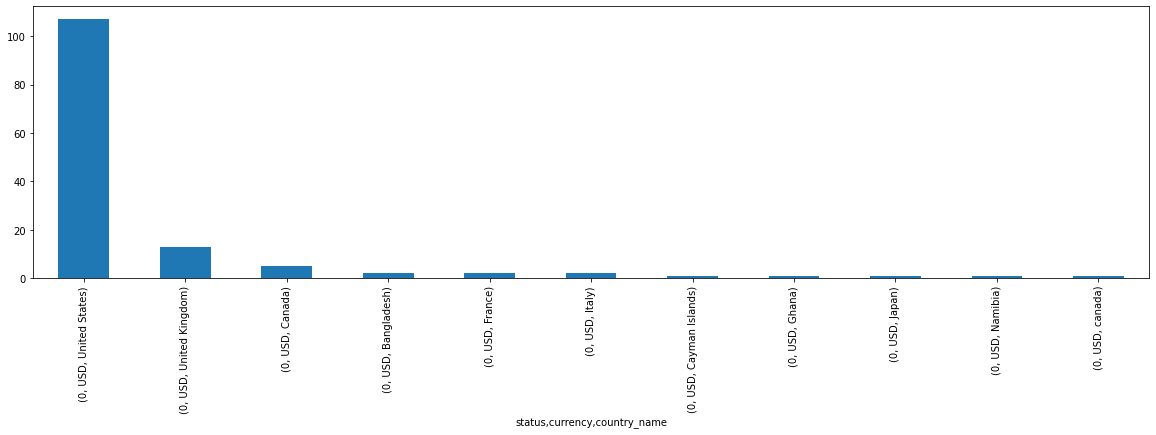

In [90]:
df3.value_counts().plot(kind='bar', figsize = (20,5))

In [82]:
"""
Query all rows with status equals 0, i.e not successful (This contained the abandoned, failed, and reversed payments)
where country_name is not Nigeria and currency is Naira
"""
df4 = df_new.query("status == 0 and country_name != 'Nigeria' and currency == 'NGN'")
print(df4)

      status currency country_name
2          0      NGN          NaN
5          0      NGN          NaN
8          0      NGN          NaN
9          0      NGN          NaN
16         0      NGN          NaN
...      ...      ...          ...
3263       0      NGN          NaN
3268       0      NGN          NaN
3269       0      NGN          NaN
3271       0      NGN          NaN
3273       0      NGN          NaN

[1174 rows x 3 columns]


<AxesSubplot:xlabel='status,currency,country_name'>

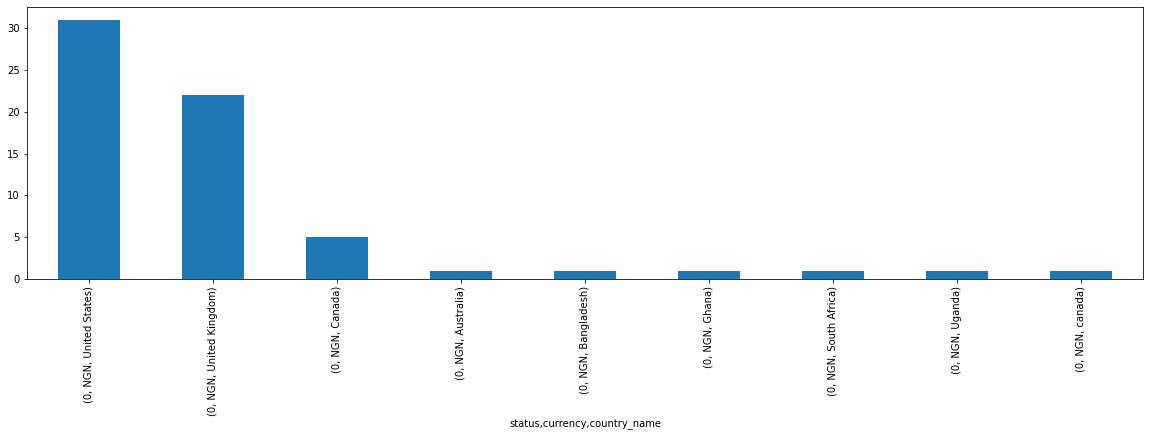

In [83]:
df4.value_counts().plot(kind='bar', figsize = (20,5))

In [88]:
"""
Query all rows with status equals 0, i.e not successful (This contained the abandoned, failed, and reversed payments)
where country_name is Nigeria and currency is not Naira
"""
df5 = df_new.query("status == 0 and country_name == 'Nigeria' and currency != 'NGN'")
print(df5)

      status currency country_name
196        0      USD      Nigeria
458        0      USD      Nigeria
576        0      USD      Nigeria
936        0      USD      Nigeria
1020       0      USD      Nigeria
1129       0      USD      Nigeria
1156       0      USD      Nigeria
1277       0      USD      Nigeria
1520       0      USD      Nigeria
1529       0      USD      Nigeria
1639       0      USD      Nigeria
1718       0      USD      Nigeria
1728       0      USD      Nigeria
2101       0      USD      Nigeria
2303       0      USD      Nigeria
2457       0      USD      Nigeria
2708       0      USD      Nigeria
2728       0      USD      Nigeria
2904       0      USD      Nigeria
3201       0      USD      Nigeria
3258       0      USD      Nigeria


<AxesSubplot:xlabel='status,currency,country_name'>

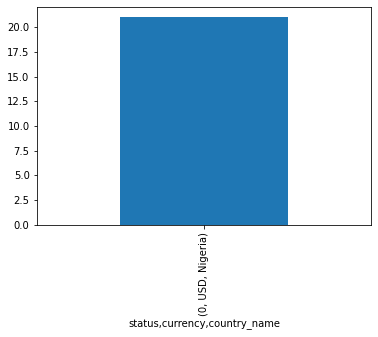

In [86]:
df5.value_counts().plot(kind='bar')

In [106]:
df.head()

,status,currency,country_name
0,failed,USD,United States
1,success,NGN,Nigeria
2,abandoned,NGN,NaN
3,success,NGN,Nigeria
4,abandoned,NGN,Nigeria


In [113]:
"""
Query all rows with status, both successful and failed (This contained the abandoned, failed, and reversed payments)
where country_name is not Nigeria and currency is Naira. 
NB: This answers the research question 
"""
df6 = df_new.query("status and country_name != 'Nigeria' and currency == 'NGN'")
print(df6)

      status currency    country_name
20         1      NGN   United States
47         1      NGN  United Kingdom
52         1      NGN  United Kingdom
56         1      NGN             NaN
66         1      NGN             NaN
...      ...      ...             ...
2879       1      NGN          Canada
2957       1      NGN   United States
3070       1      NGN  United Kingdom
3121       1      NGN  United Kingdom
3254       1      NGN   United States

[61 rows x 3 columns]


<AxesSubplot:xlabel='status,currency,country_name'>

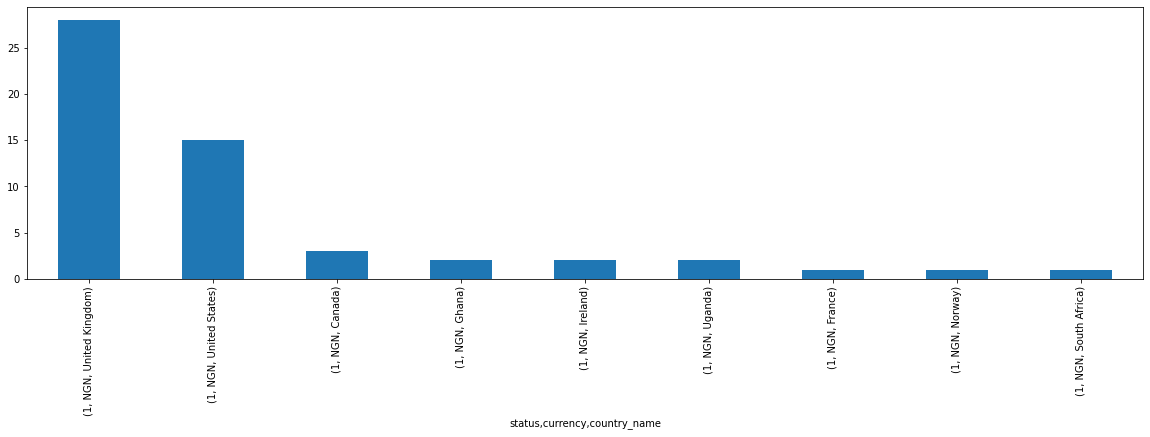

In [114]:
df6.value_counts().plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

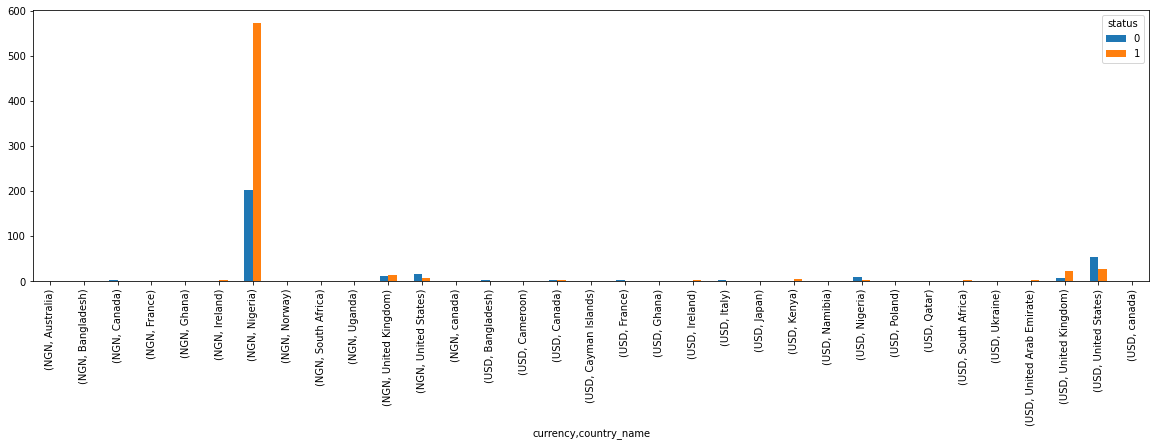

In [109]:
df_new.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

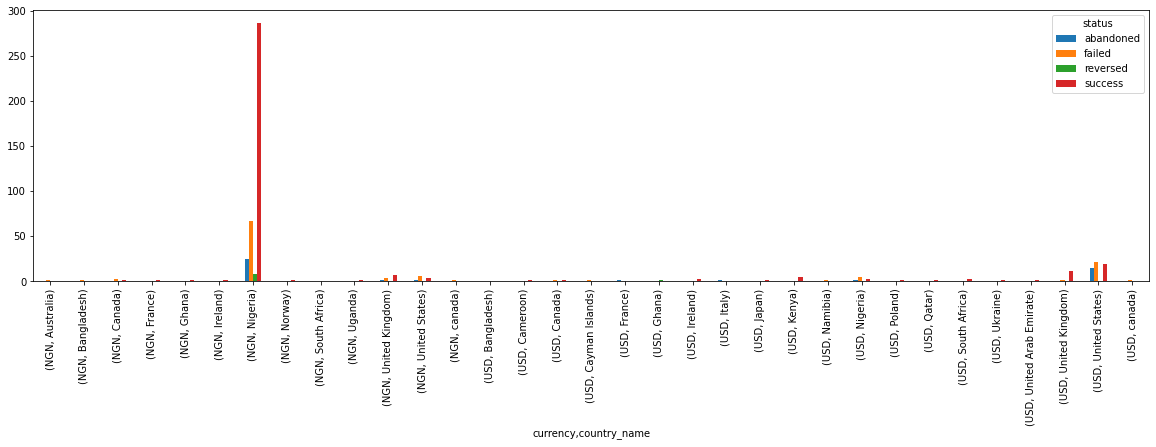

In [60]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

In [61]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [62]:
missing_value_df

,column_name,percent_missing
status,status,0.00000
currency,currency,0.00000
country_name,country_name,40.10989


In [63]:
percent_not_missing = df.notnull().sum() * 100 / len(df)
not_missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_not_missing})

In [64]:
not_missing_value_df

,column_name,percent_missing
status,status,100.00000
currency,currency,100.00000
country_name,country_name,59.89011


From the above block of code, we can see that over 40 percent of the observations of the country_code column are missing.

In [65]:
df.nunique()

status           4
currency         2
country_name    23
dtype: int64

There are only two unique currency in the data set, names NGN (Naira) and USD (Dollar)
However, there are 22 unique 

<AxesSubplot:xlabel='currency,country_name'>

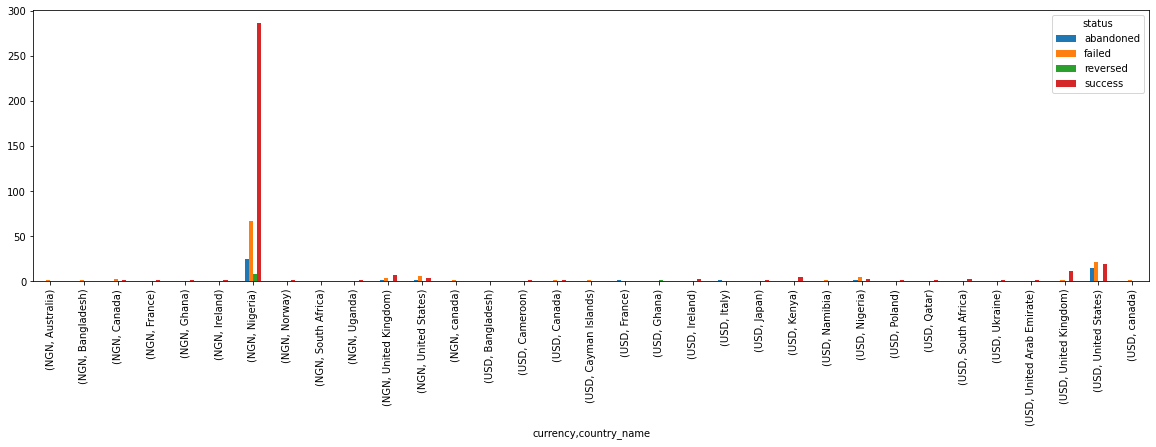

In [62]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))